Data Mining

In [220]:
f = open("C:\\Users\\cbj05\\0-Coursera ML\\ex1data1.txt", 'r')
datas = f.readlines()

for idx, j in enumerate(datas):
    j = j.replace("\n", "")
    j = list(map(float, j.split(",")))
    datas[idx] = j

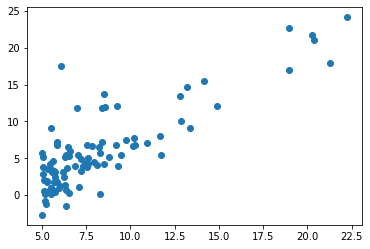

In [140]:
import numpy as np
import matplotlib.pyplot as plt

datas = np.array(datas) # 97 x 2 행렬

X = np.transpose(np.array([ np.ones(len(datas[:, 0])), datas[:, 0] ]))
y = np.transpose(np.array([datas[:, 1]]))

theta = np.zeros(2)

plt.scatter(datas[:, 0], datas[:, 1])

Defining Cost Function J 

In [144]:
iterations = 1500
learning_rate = 0.01

def costFunction(X, y, theta):
    m = len(X)
    h = np.dot(X, np.transpose(theta)) # 행렬곱
    temp = 0
    for i in range(m):
        temp = temp + np.square(h[i] - y[i])
    J = (1/(2*m)) * temp
    return J

Defining Gradient Descent Algorithm

In [209]:
def gradient_descent(X, y, theta, alpha, iterations):
    m = len(y)
    J_history = np.transpose(np.array([np.zeros(m)]))
    theta_temp = np.array([theta])
    for i in range(iterations):
        error = np.dot(X, np.transpose(theta_temp)) - y
        tmp = error * X
        tmp = np.sum(tmp, axis=0)
        diff = (alpha/m) * tmp
        theta_temp = theta_temp - diff
    return theta_temp
t = gradient_descent(X, y, theta, learning_rate, iterations)[0]


In [210]:
p1 = np.sum([1, 3.5] * t) * 10000
p2 = np.sum([1, 7] * t) * 10000

print("If population is 35,000 , predicted price is : {}$".format(p1.round(3)))
print("If population is 70,000 , predicted price is : {}$".format(p2.round(3)))

If population is 35,000 , predicted price is : 4519.768$
If population is 70,000 , predicted price is : 45342.45$


Visualizing Cost J Records

In [198]:
theta0 = np.linspace(-10, 10, 100)
theta1 = np.linspace(-1, 4, 100)
costJRecord = np.zeros((len(theta0), len(theta1)))
for i in range(len(theta0)):
    for j in range(len(theta1)):
        costJRecord[i, j] = costFunction(X, y, [theta0[i], theta1[j]])

197.47778143972653

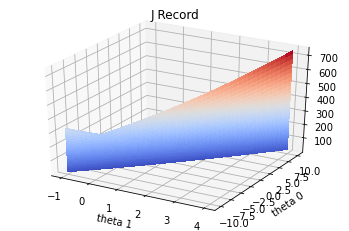

In [219]:
from mpl_toolkits.mplot3d import Axes3D  # noqa: F401 unused import

import matplotlib.pyplot as plt
from matplotlib import cm
from matplotlib.ticker import LinearLocator, FormatStrFormatter
import numpy as np

fig = plt.figure()
ax = fig.gca(projection='3d')

surf = ax.plot_surface(theta1, theta0, np.transpose(costJRecord), cmap=cm.coolwarm,
                       linewidth=0, antialiased=False)
plt.xlabel("theta 1")
plt.ylabel("theta 0")
plt.title("J Record")
plt.show()

[-3.63029144  1.16636235]


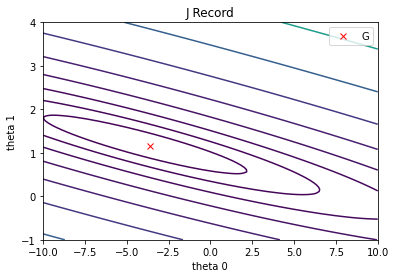

In [218]:
tt0, tt1 = np.meshgrid(theta0,theta1)

plt.figure()
plt.contour(tt0, tt1, np.transpose(costJRecord),levels=np.logspace(-2, 3, 20))
plt.xlabel("theta 0")
plt.ylabel("theta 1")
print(t)
plt.plot(t[0], t[1], 'rx')
plt.legend("G")
plt.title("J Record")
plt.show()